In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import names
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from pandas_ml import ConfusionMatrix

In [3]:
data = pd.read_csv('./names_dataset.csv',header=None)
data.head()

0          1    2
0  index       name  sex
1      0       Mary    F
2      1       Anna    F
3      2       Emma    F
4      3  Elizabeth    F

# Features 
-Last Letter

In [3]:
# extracting last letter
def feature_last(name):
    return name[-1]

In [4]:
data['last'] = data['name'].apply(feature_last)
data.head()

index       name sex last
0      0       Mary   F    y
1      1       Anna   F    a
2      2       Emma   F    a
3      3  Elizabeth   F    h
4      4     Minnie   F    e

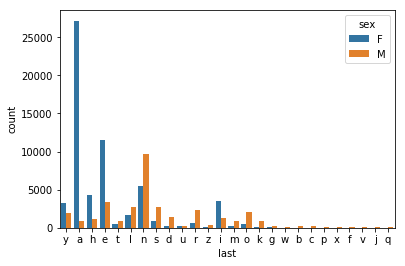

In [5]:
sns.countplot(data['last'],hue=data['sex'])

# Features
 - N-grams
    - bi-grams
    - 

In [6]:
from nltk import ngrams

In [7]:
a = list(ngrams('srikanth',2))
print(a)

[('s', 'r'), ('r', 'i'), ('i', 'k'), ('k', 'a'), ('a', 'n'), ('n', 't'), ('t', 'h')]


In [8]:
["".join(gram) for gram in a]
    

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th']

In [9]:
def bigram(name):
    bi = list(ngrams(name,2))
    return ["".join(gram) for gram in bi]

In [10]:
bigram('srikanth')

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th']

In [11]:
def trigram(name):
    bi = list(ngrams(name,3))
    return ["".join(gram) for gram in bi]

In [12]:
trigram('srikanth')

['sri', 'rik', 'ika', 'kan', 'ant', 'nth']

In [13]:
name = 'srikanth'
gram = bigram(name) + trigram(name) + [feature_last(name)]
print(gram)

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th', 'sri', 'rik', 'ika', 'kan', 'ant', 'nth', 'h']


In [14]:
# picking 1000 male names and 1000 female names
female = data[data['sex']=='F'].iloc[:1000]
male = data[data['sex']=='M'].iloc[:1000]

df = pd.concat((female,male),axis=0,ignore_index=True)

In [15]:
df['sex'].value_counts()

F    1000
M    1000
Name: sex, dtype: int64

In [16]:
# extracting all features 
def feature(name):
    gram = bigram(name) + trigram(name) + [feature_last(name)]
    return gram

In [17]:
# extracting all features 
fset = []
for name in df['name']:
    name = name.lower()
    #print(name)
    f = feature(name)
    fset.extend(f)

In [18]:
len(set(fset))

2185

In [19]:
from collections import defaultdict

In [20]:
frame = defaultdict(lambda: defaultdict(lambda:0))

In [21]:
# extract all features 
for names in df['name']:
    names = names.lower()
    for key in fset:
        frame[names][key] = 0.0

In [62]:
frame.keys()

dict_keys(['mary', 'anna', 'emma', 'elizabeth', 'minnie', 'margaret', 'ida', 'alice', 'bertha', 'sarah', 'annie', 'clara', 'ella', 'florence', 'cora', 'martha', 'laura', 'nellie', 'grace', 'carrie', 'maude', 'mabel', 'bessie', 'jennie', 'gertrude', 'julia', 'hattie', 'edith', 'mattie', 'rose', 'catherine', 'lillian', 'ada', 'lillie', 'helen', 'jessie', 'louise', 'ethel', 'lula', 'myrtle', 'eva', 'frances', 'lena', 'lucy', 'edna', 'maggie', 'pearl', 'daisy', 'fannie', 'josephine', 'dora', 'rosa', 'katherine', 'agnes', 'marie', 'nora', 'may', 'mamie', 'blanche', 'stella', 'ellen', 'nancy', 'effie', 'sallie', 'nettie', 'della', 'lizzie', 'flora', 'susie', 'maud', 'mae', 'etta', 'harriet', 'sadie', 'caroline', 'katie', 'lydia', 'elsie', 'kate', 'susan', 'mollie', 'alma', 'addie', 'georgia', 'eliza', 'lulu', 'nannie', 'lottie', 'amanda', 'belle', 'charlotte', 'rebecca', 'ruth', 'viola', 'olive', 'amelia', 'hannah', 'jane', 'virginia', 'emily', 'matilda', 'irene', 'kathryn', 'esther', 'willi

In [23]:
for name in df['name']:
    name = name.lower()
    f = feature(name)
    for fkey in f:
        frame[name][fkey] +=1.0

In [24]:
dframe = pd.DataFrame(frame).T

In [25]:
dframe

a   aa  aac  aar   ab  abb  abe  abi  abl  abn ...   zoe  zol  \
mary       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
anna       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
emma       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
elizabeth  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0   
minnie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
margaret   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
ida        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
alice      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
bertha     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
sarah      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
annie      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
clara      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
ella       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
florence   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
cora       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
martha     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
laura      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
nellie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
grace      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
carrie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
maude      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
mabel      0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0   
bessie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
jennie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
gertrude   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
julia      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
hattie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
edith      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
mattie     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
rose       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...   
reed       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
thos       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
todd       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
wirt       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
alvis      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
ammon      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
boss       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
cas        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
cass       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
chalmer    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
denton     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
elsworth   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
erving     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
fredric    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
furman     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
plummer    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
rollo      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
ruffus     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
sheldon    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
tilman     0.0  0.0  0.0  0.0  0.0 

In [26]:
dframe[dframe['a'].isnull()]

Empty DataFrame
Columns: [a, aa, aac, aar, ab, abb, abe, abi, abl, abn, abr, ac, ace, ach, aci, ack, aco, acy, ad, ada, add, ade, adf, adg, adi, adl, ado, adr, ady, ae, ael, aes, af, afa, afe, ag, aga, agd, agg, agn, ago, agu, ah, aha, ahl, ai, aia, aid, ail, aim, ain, air, ais, ait, aj, ajo, ak, ake, al, ala, alb, alc, ald, ale, alf, alg, ali, alk, all, alm, alo, alp, als, alt, alu, alv, aly, am, ama, amb, ame, ami, amm, amo, amp, ams, amu, amy, an, ana, anc, and, ane, anf, ang, ani, ank, anl, ann, ano, ...]
Index: []

[0 rows x 2185 columns]

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model = MultinomialNB()

In [29]:
x = dframe.iloc[:, :].values
y = df['sex'].values

In [30]:
x.shape  ,y.shape

((2000, 2185), (2000,))

In [31]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
model.score(x,y)

0.894

In [89]:
test = defaultdict(lambda: defaultdict(lambda:0)) # rows and columns ::// 2D
name = 'mari'
name = name.lower()
for key in fset:
    test[name][key] = 0.0
    
f = feature(name)
for fkey in f:
    if fkey in fset:
        test[name][fkey] += 1.0
    
test_array = pd.DataFrame(test).T.values

In [90]:
len(test_array[0])

2185

In [91]:
len(set(fset))

2185

In [92]:
pd.DataFrame(test).T

a   aa  aac  aar   ab  abb  abe  abi  abl  abn ...   zoe  zol  zon  \
mari  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

      zor   zr  zra   zu  zul   zz  zzi  
mari  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 2185 columns]

In [93]:
model.predict(test_array)

array(['F'], dtype='<U1')